In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('D:spyderpractice/titanic.csv')
data.head(10)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
5,6,28.0,8.4583,0,0,0,0,0,0,0,...,0,0,0,3,0,0,1.0,0,0,0
6,7,54.0,51.8625,0,0,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,0
7,8,2.0,21.0750,0,3,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
8,9,27.0,11.1333,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
9,10,14.0,30.0708,1,1,0,0,0,0,0,...,0,0,0,2,0,0,0.0,0,0,1


In [3]:
data.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', 'Survived'],
      dtype='object')

In [4]:
data.describe()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,...,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1307.000000,1309.0,1309.0,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.294882,0.0,0.0,1.492731,0.0,0.0,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.837836,0.0,0.0,0.814626,0.0,0.0,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.000000,0.0,0.0,1.000000,0.0,0.0,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
Passengerid    1309 non-null int64
Age            1309 non-null float64
Fare           1309 non-null float64
Sex            1309 non-null int64
sibsp          1309 non-null int64
zero           1309 non-null int64
zero.1         1309 non-null int64
zero.2         1309 non-null int64
zero.3         1309 non-null int64
zero.4         1309 non-null int64
zero.5         1309 non-null int64
zero.6         1309 non-null int64
Parch          1309 non-null int64
zero.7         1309 non-null int64
zero.8         1309 non-null int64
zero.9         1309 non-null int64
zero.10        1309 non-null int64
zero.11        1309 non-null int64
zero.12        1309 non-null int64
zero.13        1309 non-null int64
zero.14        1309 non-null int64
Pclass         1309 non-null int64
zero.15        1309 non-null int64
zero.16        1309 non-null int64
Embarked       1307 non-null float64
zero.17     

In [6]:
data.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
Survived       0
dtype: int64

In [9]:
ages=data['Age']
fair=data['Fare']
survival=data['Survived']

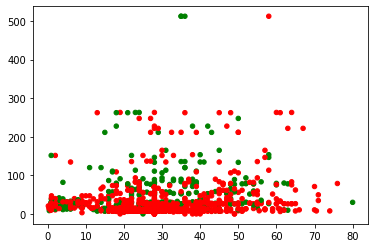

In [13]:
colors=[]
for item in survival:
    if item==0:
        colors.append('red')
    else:
        colors.append('green')
plt.scatter(ages,fair,s=20,color=colors)

In [44]:
features_list=['Age','Sex','sibsp','Pclass']
features=data[features_list]
output=data['Survived']
output.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [45]:
X_train,X_test,y_train,y_test=train_test_split(features,output,test_size=0.3)

In [46]:
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [47]:
predicted_y=model.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
score=accuracy_score(y_test,predicted_y)

In [50]:
print(score*100)

78.88040712468194
